# Importing the data and libraries
I start my analysis by loading in the training data to take a look at what type of cleaning I'll have to do, as well as importing Pandas and Numpy for data manipulation. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('training.csv')
pd.options.display.max_columns = None

To start, I take a look at the first few rows of the dataset and I check to see where the null values are and what type of cleaning will need to be done based on the information provided in the data dictionary file. 

In [3]:
df_train.head(10)

,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail
0,1,0.41,NaN,SI1,L,,65.4,False,4.65x4.62x3.03,Very good,Other/Unknown,Princess,Good,NaN,1,430,850,6.063785,6.745236
1,2,0.42,AGSL,SI2,L,,61.7,False,4.85x4.79x2.98,Excellent,Russia,Marquise,Very good,NaN,1,560,920,6.327937,6.824374
2,3,0.40,AGSL,SI1,L,,64.0,False,4.66x4.63x2.97,Excellent,South Africa,Round,Excellent,57.0,1,560,575,6.327937,6.354370
3,4,0.41,AGSL,SI2,L,,62.7,False,4.71x4.69x2.95,Very good,Botswana,Round,Very good,58.0,1,560,825,6.327937,6.715383
4,5,0.40,AGSL,SI1,L,,63.0,False,4.71x4.68x2.96,Excellent,Botswana,Round,Very good,58.0,1,580,890,6.363028,6.791221
5,6,0.40,AGSL,VS2,M,,59.9,False,4.75x4.74x2.84,Very good,Botswana,Round,Very good,64.0,1,580,945,6.363028,6.851185
6,7,0.40,AGSL,VVS1,M,,63.4,False,4.68x4.65x2.95,Very good,South Africa,Round,Good,58.0,1,580,950,6.363028,6.856462
7,8,0.40,AGSL,VS2,M,,62.4,False,4.69x4.66x2.91,Excellent,Russia,Round,Very good,59.0,1,585,965,6.371612,6.872128
8,9,0.40,AGSL,SI1,L,,NaN,False,4.77x4.75x2.93,Excellent,Botswana,Round,Very good,58.0,1,585,885,6.371612,6.785588
9,10,0.40,AGSL,SI1,L,,62.9,False,4.72x4.69x2.96,Excellent,Russia,Round,Very good,55.0,1,585,965,6.371612,6.872128


Initially I see that there are null values in the 'Cert' column which notes what organization granted the certifcation. After a brief search, I found that a diamond does not always have a certificate so we can simply replace the nulls with the 'None' category. 

Additionally, the 'Clarity', 'Color', 'Cut', 'Polish', and 'Symmetry' columns are ordinal values, meaning their values are on a ranked scale. So instead of multiple binary columns for each unique value in each column, each column will remain with each observation changed to its corresponding rank.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8050 entries, 0 to 8049
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8050 non-null   int64  
 1   Carats                  8050 non-null   float64
 2   Cert                    7498 non-null   object 
 3   Clarity                 8050 non-null   object 
 4   Color                   8050 non-null   object 
 5   Cut                     8050 non-null   object 
 6   Depth                   6610 non-null   float64
 7   Known_Conflict_Diamond  8050 non-null   bool   
 8   Measurements            8050 non-null   object 
 9   Polish                  8050 non-null   object 
 10  Regions                 8050 non-null   object 
 11  Shape                   8050 non-null   object 
 12  Symmetry                8050 non-null   object 
 13  Table                   5519 non-null   float64
 14  Vendor                  8050 non-null   

In [5]:
df_train.describe()

,id,Carats,Depth,Table,Vendor,Price,Retail,LogPrice,LogRetail
count,8050.000000,8050.000000,6610.000000,5519.000000,8050.000000,8.050000e+03,8.050000e+03,8050.000000,8050.000000
mean,4025.500000,1.265807,61.723374,57.951984,2.050435,1.508101e+04,2.149478e+04,8.803274,9.127529
std,2323.979167,0.894574,2.192793,3.051339,0.983876,3.564261e+04,5.146239e+04,1.225854,1.282771
min,1.000000,0.400000,0.000000,0.000000,1.000000,3.950000e+02,4.500000e+01,5.978886,3.806662
25%,2013.250000,0.700000,61.000000,57.000000,1.000000,2.690000e+03,3.571250e+03,7.897296,8.180671
50%,4025.500000,1.040000,62.000000,58.000000,2.000000,7.050000e+03,1.033500e+04,8.860783,9.243291
75%,6037.750000,1.510000,62.600000,59.000000,3.000000,1.466000e+04,2.052000e+04,9.592878,9.929155
max,8050.000000,11.920000,69.700000,69.000000,4.000000,1.087785e+06,1.675190e+06,13.899654,14.331437


In [6]:
for column in df_train.columns:
    print(column,"Values :")
    print(df_train[column].value_counts())
    print('')

id Values :
1       1
5363    1
5376    1
5375    1
5374    1
       ..
2679    1
2678    1
2677    1
2676    1
8050    1
Name: id, Length: 8050, dtype: int64

Carats Values :
1.01    511
0.40    425
0.50    301
1.00    278
0.90    236
       ... 
3.32      1
3.45      1
8.13      1
7.27      1
7.62      1
Name: Carats, Length: 393, dtype: int64

Cert Values :
AGSL     6973
GemEx     525
Name: Cert, dtype: int64

Clarity Values :
SI2     2208
SI1     2168
VS2     1569
VS1     1130
VVS2     448
VVS1     239
IF       137
I1       132
I2        13
FL         2
N          2
I3         1
None       1
Name: Clarity, dtype: int64

Color Values :
G            1188
I            1158
H            1092
E            1042
F            1000
J             843
D             816
K             540
L             259
M              85
Ffg             2
N               2
Ffcdbrown       2
Fvyellow        2
Fdy             2
Ffcy            1
P               1
Fiy             1
W               1
Ffcg       

# Exploring and Cleaning the Data
I first separate the columns into categorical and numeric columns to make creating the visualizations easier. 

In [7]:
categorical_columns = ['Cert', 'Clarity', 'Color', 'Cut', 'Known_Conflict_Diamond', 'Polish', 'Regions', 'Shape', 'Symmetry', 'Vendor']
numeric_columns = ['Carats', 'Depth', 'Table']

I start by looking at the categorical columns and visualize them with bar plots. You notice this is simply the information we gained from calling .value_counts on each column and helps us see which columns will require cleaning/imputing values. 

<IPython.core.display.Javascript object>

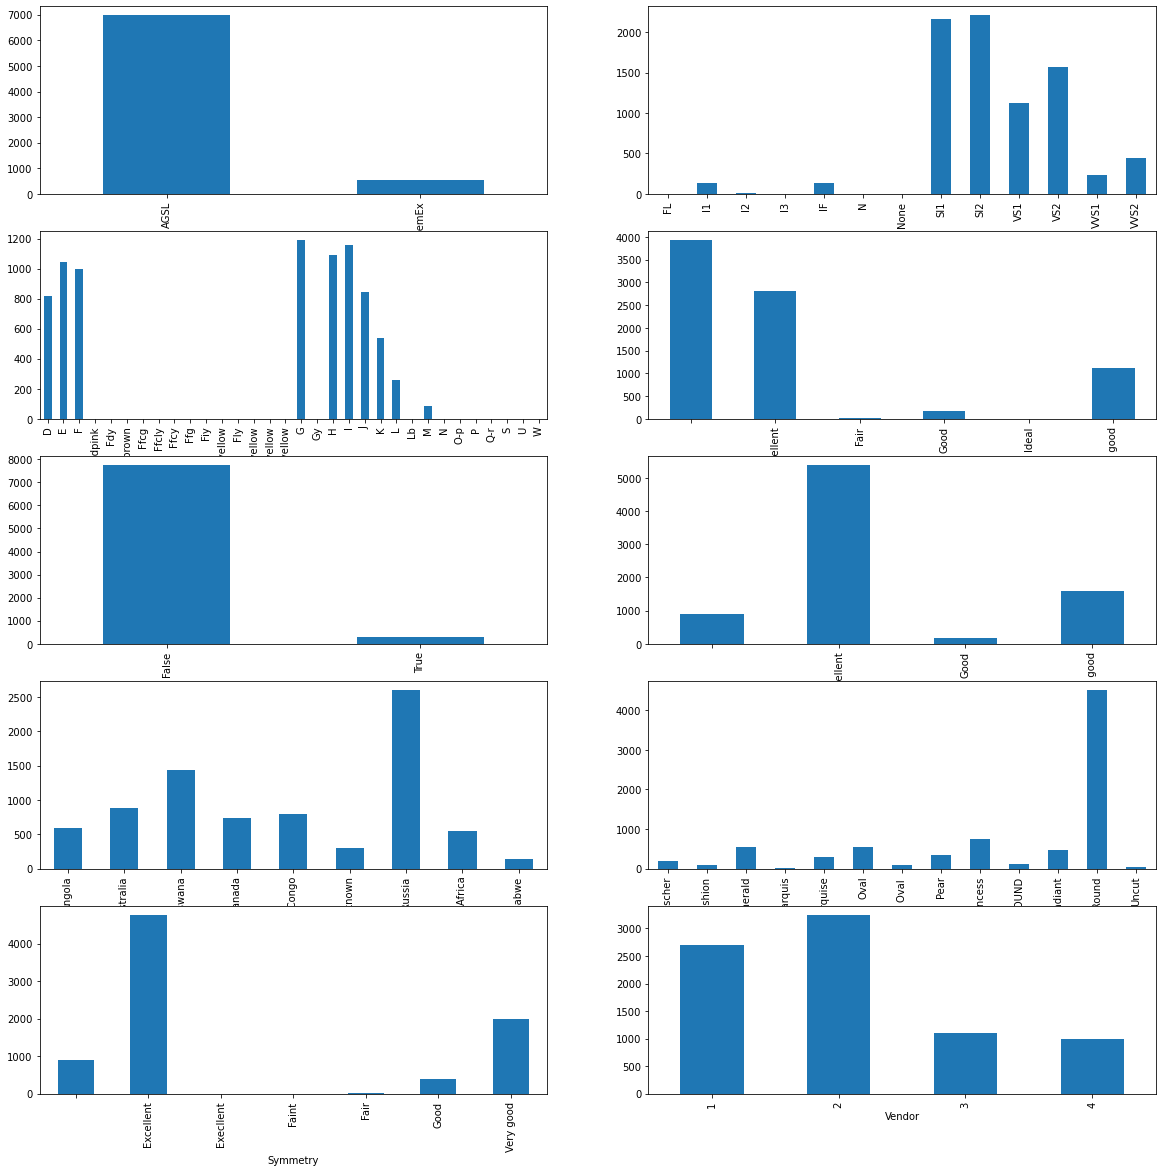

In [8]:
fig, subplot = plt.subplots(nrows = 5, ncols = 2, figsize=(20,20))
axe = subplot.ravel()

for x, plot in zip(categorical_columns, range(len(categorical_columns))):
    df_train.groupby(x).size().plot(kind='bar', ax = axe[plot])

By creating histograms of the numeric columns, we see that the 'Carats' column is positively skewed which is expected as heavier diamonds are rarer than smaller, lighter diamonds. The 'Depth' and 'Table' values are within tighter ranges but I will have to handle the outliers in order to avoid having the algorithm be incorrectly trained with extreme values.

array([[<AxesSubplot:title={'center':'Carats'}>,
        <AxesSubplot:title={'center':'Depth'}>],
       [<AxesSubplot:title={'center':'Table'}>, <AxesSubplot:>]],
      dtype=object)

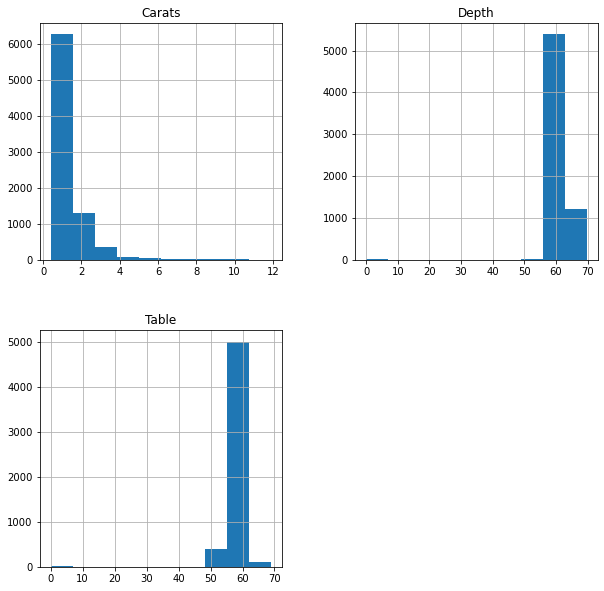

In [9]:
from matplotlib import pyplot as plt
df_train.hist(numeric_columns, figsize=(10, 10))

In the 'Depth' column, I noticed there are some outliers around 0 so I pulled up any values below 58 as that appears to be the next bin where a majority of the observations fall. Confiming my suspicion, I then replace those values with , to eliminate those outliers.

In [10]:
df_train.loc[df_train['Depth'] < 58.0].sort_values(by='Depth', ascending = True)

,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail
7707,7708,1.51,AGSL,None,Fly,Excellent,0.0,False,7.1x7.2x4.66,Good,Australia,Oval,Good,0.0,3,10010,15400,9.211340,9.642123
7220,7221,1.32,AGSL,SI1,Ffcdbrown,,0.0,False,6.96x7.12x4.15,,Botswana,Round,,0.0,2,3120,5710,8.045588,8.649974
4979,4980,0.81,AGSL,VS1,Flyellow,,0.0,False,5.93x5.96x3.7,Good,Botswana,Round,Excellent,0.0,1,2715,3790,7.906547,8.240121
4933,4934,1.04,AGSL,SI2,Fyellow,,0.0,False,6.25x6.49x4.07,,Angola,Round,,0.0,2,4040,6865,8.304000,8.834191
4292,4293,0.71,NaN,SI2,Ffcdbrown,,0.0,False,5.42x5.5x3.69,,Russia,Round,,0.0,1,955,1585,6.861711,7.368340
6904,6905,11.92,GemEx,SI1,S,Fair,50.8,False,15.88x15.8x8.06,Very good,Botswana,Round,Good,69.0,2,154960,231695,11.950922,12.353177
6831,6832,4.80,AGSL,SI2,L,Fair,51.7,False,11.49x11.5x5.94,Good,Angola,Round,Good,NaN,2,38890,59825,10.568492,10.999179
6850,6851,10.02,NaN,SI2,M,Fair,52.7,False,14.56x14.65x7.69,Good,Russia,Oval,Good,66.0,2,132865,199065,11.797089,12.201387
7212,7213,8.77,AGSL,VS1,H,Fair,54.8,False,14.07x13.94x7.67,Excellent,Botswana,Marquise,Very good,NaN,2,363920,540850,12.804689,13.200897
1426,1427,0.62,AGSL,VS1,G,,54.9,False,5.7x5.75x3.14,Good,Botswana,Oval,Good,62.0,1,2620,3900,7.870930,8.268732


In [11]:
df_train['Depth'][df_train['Depth'] < 58.0] = 58.0

C:\Users\jvasq\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Similarly, the 'Table' column has this issue so I repeat the process and update the outliers with 54.0.

In [12]:
df_train[df_train['Table'] < 54].sort_values(by = 'Table', ascending = True)

,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail
7707,7708,1.51,AGSL,None,Fly,Excellent,58.0,False,7.1x7.2x4.66,Good,Australia,Oval,Good,0.0,3,10010,15400,9.211340,9.642123
6396,6397,0.51,AGSL,SI2,Ffg,,58.0,False,5.18x5.25x2.99,,Russia,Oval,,0.0,2,2190,4490,7.691657,8.409608
5772,5773,0.45,AGSL,N,Fdy,,66.6,False,4.64x4.7x3.11,,Russia,Round,,0.0,1,975,1980,6.882437,7.590852
5006,5007,0.49,AGSL,SI1,Ffg,,NaN,False,5.12x5.16x3.05,,DR Congo,Round,,0.0,2,1940,2960,7.570443,7.992945
4979,4980,0.81,AGSL,VS1,Flyellow,,58.0,False,5.93x5.96x3.7,Good,Botswana,Round,Excellent,0.0,1,2715,3790,7.906547,8.240121
4933,4934,1.04,AGSL,SI2,Fyellow,,58.0,False,6.25x6.49x4.07,,Angola,Round,,0.0,2,4040,6865,8.304000,8.834191
4256,4257,0.91,AGSL,SI2,Ffcly,,61.1,False,6.19x6.22x3.79,,Botswana,Princess,,0.0,1,1530,2655,7.333023,7.884200
4292,4293,0.71,NaN,SI2,Ffcdbrown,,58.0,False,5.42x5.5x3.69,,Russia,Round,,0.0,1,955,1585,6.861711,7.368340
7220,7221,1.32,AGSL,SI1,Ffcdbrown,,58.0,False,6.96x7.12x4.15,,Botswana,Round,,0.0,2,3120,5710,8.045588,8.649974
4797,4798,1.71,AGSL,I1,L,,62.9,False,7.69x7.51x4.78,Good,Russia,Asscher,Fair,46.0,1,6400,9850,8.764053,9.195227


In [13]:
df_train['Table'][df_train['Table'] < 53.0] = 53.0

C:\Users\jvasq\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[<AxesSubplot:title={'center':'Carats'}>,
        <AxesSubplot:title={'center':'Depth'}>],
       [<AxesSubplot:title={'center':'Table'}>, <AxesSubplot:>]],
      dtype=object)

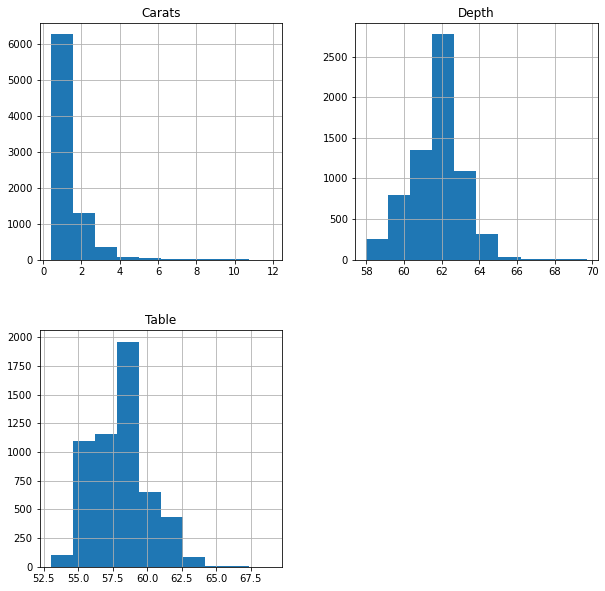

In [14]:
df_train.hist(numeric_columns, figsize=(10, 10))

In [15]:
df_train.loc[df_train['Depth'] > 64.75].sort_values(by='Depth', ascending = True)

,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail
966,967,0.50,AGSL,VS1,H,,64.8,False,4.98x4.94x3.21,Very good,Russia,Princess,Very good,58.0,1,1635,2695,7.399398,7.899153
99,100,0.40,AGSL,VS2,J,,64.8,False,4.64x4.61x3,Excellent,Russia,Princess,Very good,NaN,1,705,1165,6.558198,7.060476
6065,6066,0.48,AGSL,I1,H,Fair,64.8,False,4.9x4.8x3.14,Very good,Botswana,Round,Good,63.0,1,580,905,6.363028,6.807935
4311,4312,1.01,AGSL,SI2,H,Good,64.8,False,6.15x6.22x4.01,Excellent,Australia,Round,Very good,58.0,1,4695,7945,8.454253,8.980298
753,754,0.50,AGSL,VVS2,J,,64.8,False,5.01x4.97x3.24,Excellent,Russia,Princess,Very good,55.0,1,1190,1960,7.081709,7.580700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5288,5289,1.02,AGSL,SI2,H,Fair,67.6,False,6.1x6.05x4.11,Good,Russia,Emerald,Good,60.0,1,3980,6710,8.289037,8.811354
6765,6766,0.70,AGSL,VS2,G,Fair,67.9,True,5.36x5.49x3.68,Good,Angola,Round,Good,61.0,1,2590,455,7.859413,6.120297
7978,7979,0.43,AGSL,SI1,G,Excellent,68.5,False,4.99x5.01x2.93,Excellent,Russia,Round,Excellent,60.0,1,1245,2045,7.126891,7.623153
2142,2143,1.00,AGSL,SI1,E,,69.4,False,5.97x6x4.16,,Botswana,Round,,55.0,1,5645,9150,8.638525,9.121509


In [16]:
df_train['Depth'][df_train['Depth'] > 64.75] = 64.75

C:\Users\jvasq\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_train[df_train['Table'] > 63].sort_values(by = 'Table', ascending = True)

,id,Carats,Cert,Clarity,Color,Cut,Depth,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail
5,6,0.40,AGSL,VS2,M,,59.9,False,4.75x4.74x2.84,Very good,Botswana,Round,Very good,64.0,1,580,945,6.363028,6.851185
7073,7074,0.59,AGSL,SI1,J,Good,59.2,False,5.47x5.48x3.25,Very good,Botswana,Radiant,Very good,64.0,1,1475,2360,7.296413,7.766417
6444,6445,0.58,AGSL,SI2,E,Good,62.3,False,5.35x5.32x3.32,Excellent,Angola,Radiant,Good,64.0,1,1805,2965,7.498316,7.994632
6412,6413,1.01,AGSL,SI2,G,Very good,58.0,False,6.65x6.67x3.82,Very good,Angola,Cushion,Very good,64.0,3,6650,11250,8.802372,9.328123
6336,6337,0.88,AGSL,VVS2,L,Good,NaN,False,6.3x6.42x3.61,Good,Russia,Round,Good,64.0,1,2505,4115,7.826044,8.322394
6084,6085,0.50,AGSL,SI2,H,Very good,60.1,False,5.14x5.19x3.1,Very good,Russia,Round,Good,64.0,1,1290,2080,7.162397,7.640123
5529,5530,0.44,AGSL,VS1,H,Good,NaN,False,5.07x5.1x2.92,Very good,Russia,Round,Very good,64.0,1,1225,1765,7.110696,7.475906
5502,5503,1.04,AGSL,VS2,J,Very good,59.2,False,6.6x6.69x3.93,Very good,DR Congo,Princess,Very good,64.0,2,5830,9715,8.670772,9.181426
4602,4603,0.78,AGSL,VS2,E,Very good,58.5,False,6.07x6.04x3.54,Excellent,Russia,Round,Excellent,64.0,2,4235,6950,8.351139,8.846497
4586,4587,0.50,AGSL,VVS2,G,Good,61.8,False,5.01x5.04x3.11,Very good,Russia,Round,Excellent,64.0,1,1800,2955,7.495542,7.991254


In [18]:
df_train['Table'][df_train['Table'] > 64.0] = 64.0

C:\Users\jvasq\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[<AxesSubplot:title={'center':'Carats'}>,
        <AxesSubplot:title={'center':'Depth'}>],
       [<AxesSubplot:title={'center':'Table'}>, <AxesSubplot:>]],
      dtype=object)

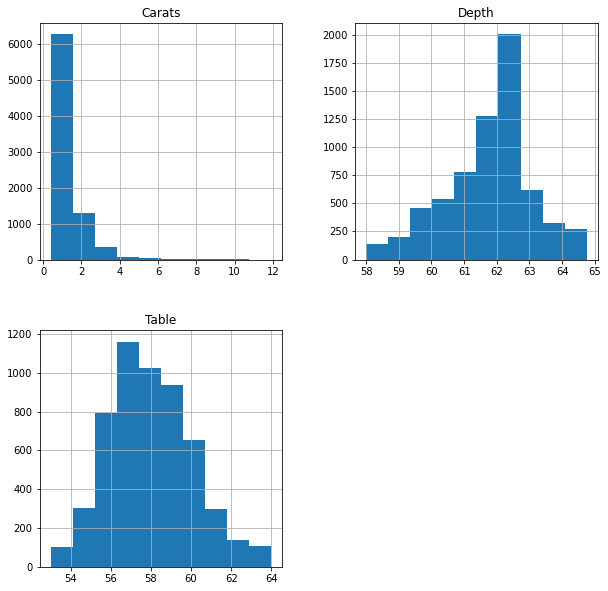

In [19]:
df_train.hist(numeric_columns, figsize=(10, 10))

In [20]:
#Cert can be left as is since not all diamonds have certificates, fill NAs
#Clarity ordinal encoding??
#Clean Color (categorical) column: too many dupe colors; convert to ordinal encoding
#Impute Cut values? (knn, could be uncut diamonds?, drop entirely?)
#Create new column for volume from Measurements column
#Polish: Fill NA with 'None' 
#Fix Shape column dupes (round)
#Fix Symmetry column (Excellent)
#Vendor column needs to be categorical instead of int
#Drop Log columns
#Depth: impute values (median? knn?)
#Table: impute values (median? knn?)

The 'Cert' column notes what organization provided the certification for the diamond, if applicable. As it is not necessary for a diamond to be certified, I fill any null values with category 'None'. The AGSL provides the overwhelming majority of certificates for diamonds, with GemEx and None having roughly equal quantities. I also plot the 'Price' column against the 'Cert' categories, while removing the top 5% most expensive diamonds, and see that proportionally, all three categories primarily consist of diamonds costing less than $10,000. 

In [21]:
#Cert: fill NAs
df_train['Cert'] = df_train['Cert'].fillna('None')
df_train.Cert.value_counts()

AGSL     6973
None      552
GemEx     525
Name: Cert, dtype: int64

<AxesSubplot:xlabel='Cert', ylabel='Price'>

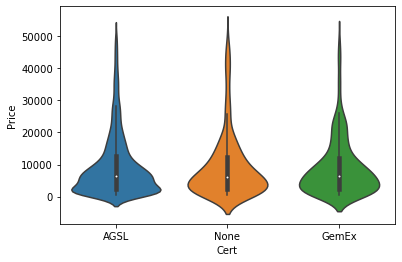

In [22]:
import seaborn as sns
cert_price = df_train[['Cert','Price']].sort_values('Price', ascending=True)[:-400]
sns.violinplot(data=cert_price, x='Cert', y='Price')

Looking at the values in the Clarity column, we see that they follow the GIA clarity scale. GIA is referred to as the gold standard when it comes to grading diamonds so it makes sense to reference their scale for diamond clarity when identifying the values in the data. The only value that is not included in their scale is 'N', which will be dropped as there are only two observations that carry this value and this value does not appear in the Offers dataset. The same will be done with the single observation carrying the 'None' value.
https://4cs.gia.edu/en-us/diamond-clarity/

In [23]:
#Clarity ordinal encoding??
df_train = df_train.loc[~df_train['Clarity'].isin(['N','None'])]
df_train['Clarity'] = df_train['Clarity'].apply(lambda x: x.strip())

In [24]:
#Replace the values with an ordinal encoding as the diamond value increases with a higher classification 
clarity_scale = {'I3':0, 'I2':1, 'I1':2, 'SI2':3, 'SI1':4, 'VS2':5, 'VS1':6, 'VVS2':7, 'VVS1':8, 'IF':9, 'FL':10}
df_train['Clarity'] = df_train['Clarity'].map(clarity_scale).fillna(0)

Similar to the clarity scale, the values in the Color column follow the GIA color scale. In addition to the colors on the color scale, there are also several rows with colors written out such as 'Fyellow' or 'Fdpink'. These colors denote "fancy" diamonds, which rather than being slightly tinted like those on the lower end of the color scale, have vivid colors and can be worth more than colorless diamonds. I convert these colors to 'Fancy' since there are not as many observations with this type of coloring, and rank them above 'D' diamonds since they can be worth more. 
https://www.gia.edu/gia-about/4cs-color 

In [25]:
#Clean Color (categorical) column: too many dupe colors 
df_train['Color'] = df_train['Color'].apply(lambda x: x.replace(x, str(x)[0]) if (len(x) > 1 and str(x)[1] == '-') else x)
df_train['Color'] = df_train['Color'].apply(lambda x: x.replace(x, 'Fancy') if (len(x) > 1) else x)

In [26]:
#Convert to ordinal encoding as well
color_scale = {'Z':0, 'Y':1, 'X':2, 'W':3, 'V':4, 'U':5, 'T':6, 'S':7, 'R':8, 'Q':9, 'P':10, 'O':11, \
               'N':12, 'M': 13, 'L':14, 'K':15, 'J':16, 'I':17, 'H':18, 'G':19, 'F':20, 'E':21, \
               'D':22, 'Fancy':23}
df_train['Color'] = df_train['Color'].map(color_scale)

The Cut column has nearly half of the observations missing a value, so those values will be filled with 'None' as opposed to imputing them in another fashion as doing so will add inaccurate data to our model. 

In [27]:
#Impute Cut values? (knn, could be uncut diamonds?, drop entirely?)
df_train['Cut'] = df_train['Cut'].replace(' ', 'None')
cut_scale = {'None':0, 'Ideal':1, 'Fair':2, 'Good':3, 'Very good':4, 'Excellent':5}
df_train['Cut'] = df_train['Cut'].map(cut_scale).fillna(0)

I also convert the 'Measurements' column into a separate column for each measurement, and add a column for a simple volume calculated with the measurements. I also create scatter plots to show the relationship between each measurement and the price and to also spot any outliers. 

In [28]:
#Create new column for measurements + volume from Measurements column 
df_train[['Length','Width','Height']] = df_train['Measurements'].str.split('x', expand = True).astype(float)

df_train.drop('Measurements', axis=1, inplace=True)
df_train['Volume'] = df_train['Length'] * df_train['Width'] * df_train['Height']

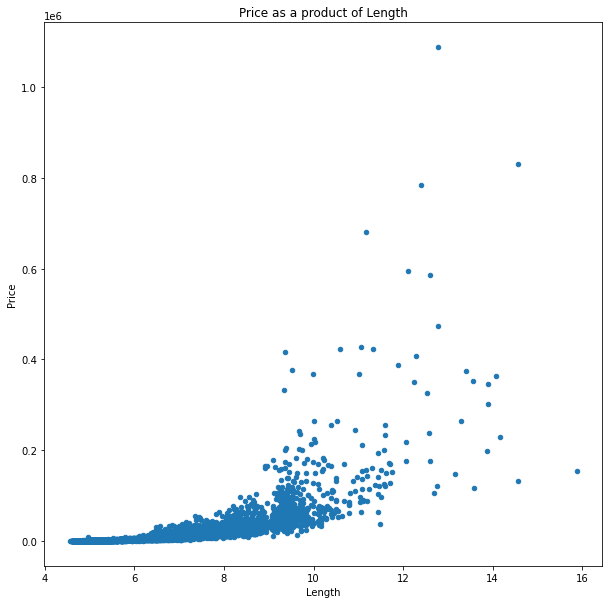

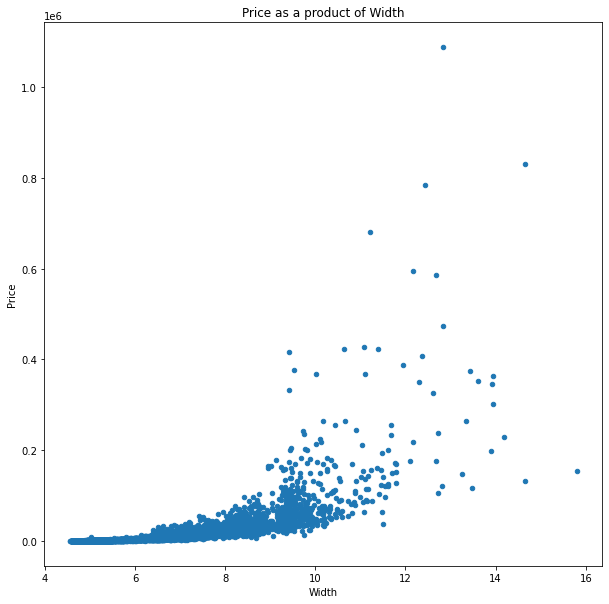

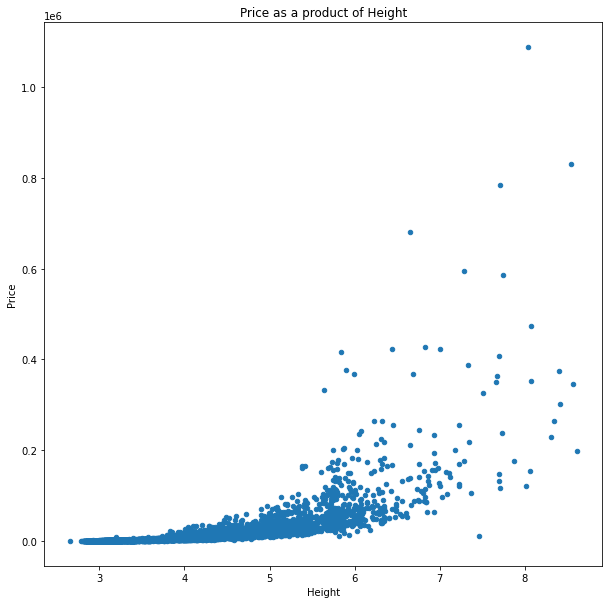

In [29]:
for x in ['Length','Width','Height']:
    df_train.plot.scatter(x=x, y='Price', figsize=(10,10), title='Price as a product of ' + x)

Seeing each measurement has outliers, I will drop those from the dataset to remove any extreme values. I also visualize the 'Depth' and 'Table' columns as scatter plots and notice that there is no notable correlation for either feature, which means they are candidates to be dropped before training the models.

In [30]:
df_train = df_train[df_train['Length'] < 9.5]
df_train = df_train[df_train['Width'] < 9.5]
df_train = df_train[df_train['Height'] < 5.5]

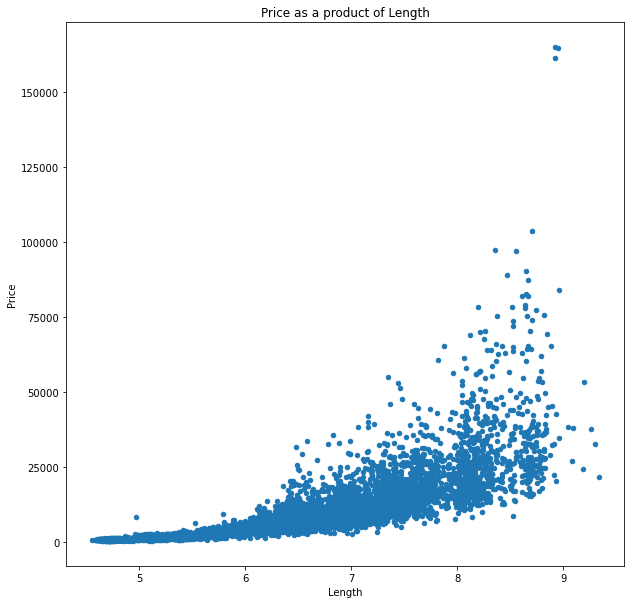

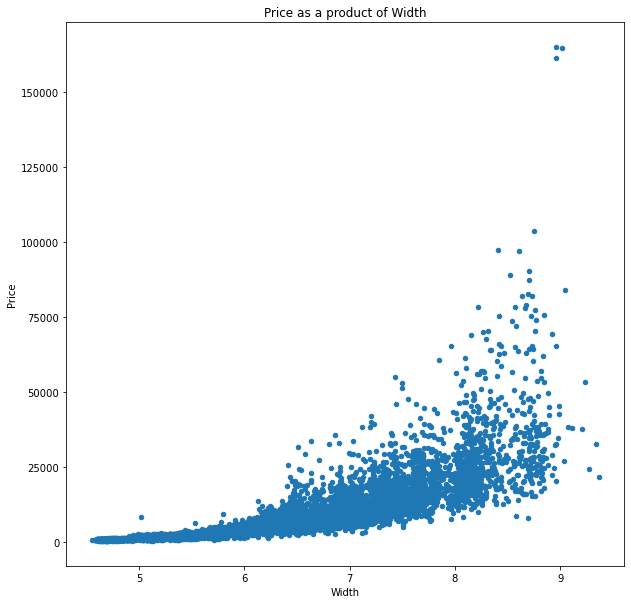

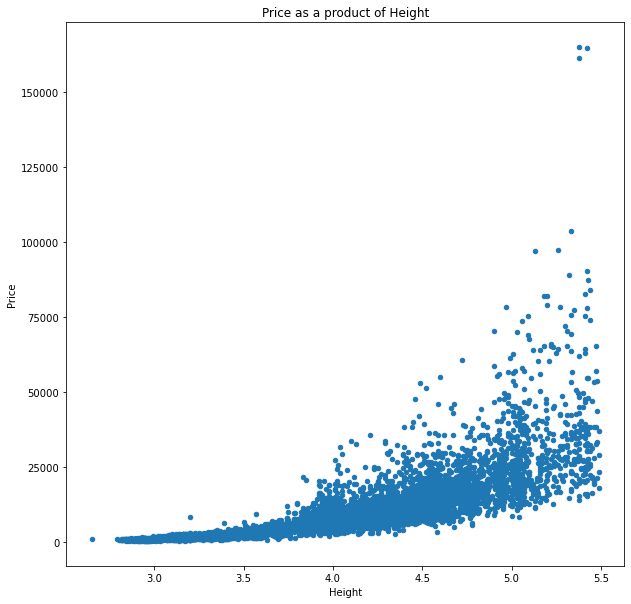

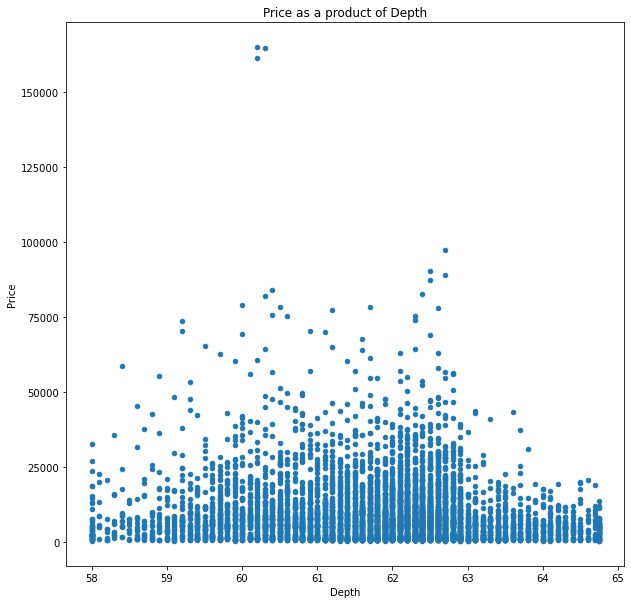

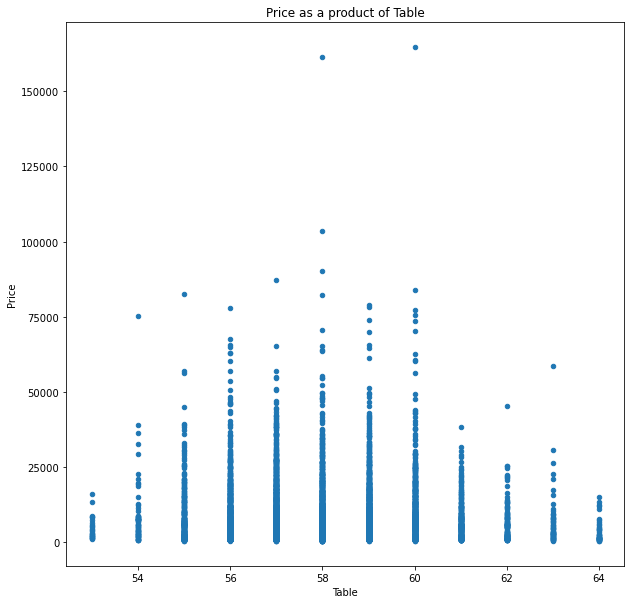

In [31]:
for x in ['Length','Width','Height', 'Depth', 'Table']:
    df_train.plot.scatter(x=x, y='Price', figsize=(10,10), title='Price as a product of ' + x)

The 'Polish' column is another column with ordinal data, so I fill in the null values and then map the values based on their rank to have numerical data for the models. 

In [32]:
#Polish: Fill NA with 'None' 
df_train['Polish'] = df_train['Polish'].replace(' ', 'None')
polish_scale = {'None':0, 'Poor':1, 'Fair':2, 'Good':3, 'Very Good':4, 'Excellent':5}
df_train['Polish'] = df_train['Polish'].map(polish_scale).fillna(0)

In the 'Shape' column, the only thing to be changed as minor spelling issues creating extra shapes within the dataset, so this corrects those issues.

In [33]:
#Fix Shape column (Round, Oval, Marquis)
df_train['Shape'] = df_train['Shape'].replace('Marquis', 'Marquise')
df_train['Shape'] = df_train['Shape'].apply(lambda x: x.strip().title())

The 'Symmetry' column is the final ordinal column in the dataset, so I correct a minor spelling issue and fill in the null values and map those accordingly.

In [34]:
#Fix Symmetry column (Excellent, NA)
df_train['Symmetry'] = df_train['Symmetry'].replace('Execllent', 'Excellent').replace(' ', 'None')
symmetry_scale = {'None':0, 'Faint':1, 'Fair':2, 'Good':3, 'Very Good':4, 'Excellent':5}
df_train['Symmetry'] = df_train['Symmetry'].map(symmetry_scale).fillna(0)

The last thing I do is convert the 'Vendor' column to string values because this column just references each vendor as 1 through 4 and is not to be interpretted as a rank. 

In [35]:
#Vendor column needs to be categorical instead of int
df_train['Vendor'] = df_train['Vendor'].astype(str)

Additionally, we see that vendor 2 appears to sell the most expensive diamonds and carries heavier diamonds than the other vendors, both of which are heavily correlated. However it appears that while vendors 3 and 4 carry some heavier diamonds, they do not sell tham at the same prices as vendor 2, which means vendor 2 is likely overcharging for their diamonds.

<AxesSubplot:xlabel='Vendor', ylabel='Price'>

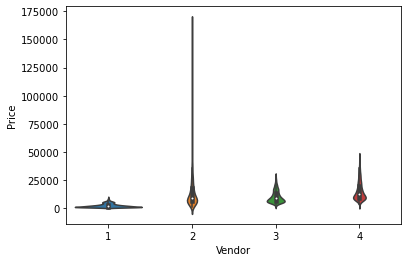

In [36]:
vendor_price = df_train[['Vendor','Price']].sort_values('Price', ascending=True)
sns.violinplot(data=vendor_price, x='Vendor', y='Price')

<AxesSubplot:xlabel='Vendor', ylabel='Carats'>

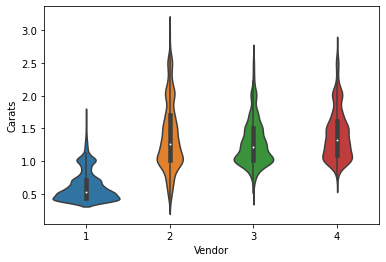

In [37]:
vendor_carat = df_train[['Vendor','Carats']].sort_values('Carats', ascending=True)
sns.violinplot(data=vendor_carat, x = 'Vendor', y = 'Carats')

With most of the data cleaned, I create a correlation plot to visualize how the data correlates with the diamond price. Understandably, the price increases as carats increase as well as with volume and the dimension lengths (larger diamonds usually means heavier diamonds). Most of the variables seem to have a positive correlation with price, even if it is minor. The other features that stand out are 'Depth' and 'Table', which are both slightly negative with nearly negligible correlations. 

<AxesSubplot:>

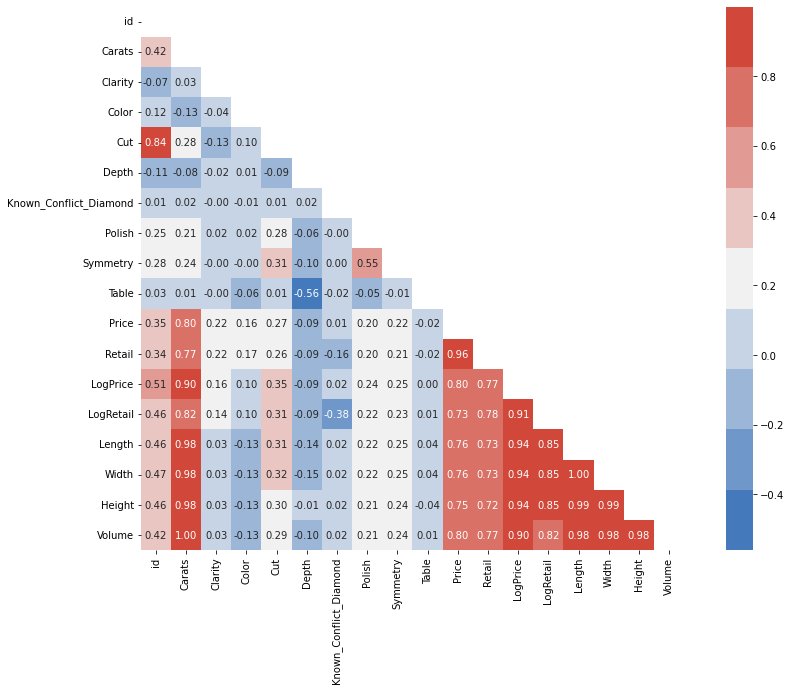

In [38]:
f, ax = plt.subplots(figsize=(15,10))
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap=sns.diverging_palette(250, 15, n=9)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, square=True, fmt='.2f')

Referencing the correlation plot, I drop the 'Depth' and 'Table' features as those have the lowest correlation and will likely only add noise to our models. While 'Known_Conflict_Diamond' does not have much correlation with the price, it has a notable negative correlation with the logarithmic retail price, which I will use later. I also leave out the 'Volume' column because even though it has high correlation with the price of diamonds, it also has high multicollinearity with the measurement columns and we want to prevent that from affecting the model. 

In [39]:
cat_cols = ['Clarity','Color','Cut','Polish','Symmetry', 'Known_Conflict_Diamond']
dummy_cat_cols = ['Regions','Shape','Vendor']
num_cols = ['Carats','Length','Width','Height']

The columns that are not ordinal categories will be encoded with OneHotEncoder, expanding them as binary columns based on the unique values for each column. Once encoded, I will combine the new columns back with our numeric and ordinal columns to form the final cleaned dataframe. 

In [40]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False)

dcc_ohe = ohe.fit_transform(df_train[dummy_cat_cols])
encoded_column_names = ohe.get_feature_names(dummy_cat_cols)
df_dcc_ohe = pd.DataFrame(dcc_ohe, index = df_train.index, columns = encoded_column_names)

C:\Users\jvasq\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
df_encoded = pd.concat([df_dcc_ohe, df_train[cat_cols], df_train[num_cols]], axis=1)

Below is a function that combines all of the cleaning steps from above to apply more easily to the 'offers' dataset. 

In [42]:
def data_processor(df):
    df['Cert'] = df['Cert'].fillna('None')

    df = df.loc[~df['Clarity'].isin(['N','None'])]
    df['Clarity'] = df['Clarity'].apply(lambda x: x.strip())
    clarity_scale = {'I3':0, 'I2':1, 'I1':2, 'SI2':3, 'SI1':4, 'VS2':5, 'VS1':6, 'VVS2':7, 'VVS1':8, 'IF':9, 'FL':10}
    df['Clarity'] = df['Clarity'].map(clarity_scale).fillna(0)

    df['Color'] = df['Color'].apply(lambda x: x.replace(x, str(x)[0]) if (len(x) > 1 and str(x)[1] == '-') else x)
    df['Color'] = df['Color'].apply(lambda x: x.replace(x, 'Fancy') if (len(x) > 1) else x)
    color_scale = {'Z':0, 'Y':1, 'X':2, 'W':3, 'V':4, 'U':5, 'T':6, 'S':7, 'R':8, 'Q':9, 'P':10, 'O':11, \
                   'N':12, 'M': 13, 'L':14, 'K':15, 'J':16, 'I':17, 'H':18, 'G':19, 'F':20, 'E':21, \
                   'D':22, 'Fancy':23}
    df['Color'] = df['Color'].map(color_scale)

    df['Cut'] = df['Cut'].replace(' ', 'None')
    cut_scale = {'None':0, 'Ideal':1, 'Fair':2, 'Good':3, 'Very good':4, 'Excellent':5}
    df['Cut'] = df['Cut'].map(cut_scale).fillna(0)
    
    df['Known_Conflict_Diamond'].fillna(df['Known_Conflict_Diamond'].mode()[0], inplace = True)

    df['Measurements'].replace('*','x')
    df[['Length','Width','Height']] = df['Measurements'].str.split('x', expand = True).astype(float)
    df.drop('Measurements', axis=1, inplace=True)
    df['Volume'] = df['Length'] * df['Width'] * df['Height']

    df = df[df['Length'] < 9.5]
    df = df[df['Width'] < 9.5]
    df = df[df['Height'] < 5.5]

    df['Polish'] = df['Polish'].replace(' ', 'None')
    polish_scale = {'None':0, 'Poor':1, 'Fair':2, 'Good':3, 'Very Good':4, 'Excellent':5}
    df['Polish'] = df['Polish'].map(polish_scale).fillna(0)

    df['Shape'] = df['Shape'].replace('Marquis', 'Marquise')
    df['Shape'] = df['Shape'].apply(lambda x: x.strip().title())
    
    df['Symmetry'] = df['Symmetry'].replace('Execllent', 'Excellent').replace(' ', 'None')
    symmetry_scale = {'None':0, 'Faint':1, 'Fair':2, 'Good':3, 'Very Good':4, 'Excellent':5}
    df['Symmetry'] = df['Symmetry'].map(symmetry_scale).fillna(0)
    
    df['Vendor'] = df['Vendor'].astype(str)
    
    cat_cols = ['Clarity','Color','Cut','Polish','Symmetry', 'Known_Conflict_Diamond']
    dummy_cat_cols = ['Regions','Shape','Vendor']
    num_cols = ['Carats','Length','Width','Height']
    
    dcc_ohe = ohe.transform(df[dummy_cat_cols])
    encoded_column_names = ohe.get_feature_names(dummy_cat_cols)
    df_dcc_ohe = pd.DataFrame(dcc_ohe, index = df.index, columns = encoded_column_names)
    
    df_encoded = pd.concat([df_dcc_ohe, df[cat_cols], df[num_cols]], axis=1)
    return df_encoded

# Training and Evaluating the Models
Now that the data is clean, we can begin training and evaluating the models to predict how much to offer for our 'offers' diamond set. 

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

I use the 'LogPrice' column instead of the 'Price' column as using the logarithmic price allows us to more clearly understand the percentage differences in our price better than linear prices do. For example, comparing two diamonds that are \\$1,000 and \\$2,000 respectively, the second diamond is 100% more expensive than the first, and the percentage would be the same between a \\$2,000 diamond and one that costs \\$4,000.

In [44]:
#Split data into train, test data
price_X_train, price_X_test, price_y_train, price_y_test = train_test_split(df_encoded, df_train['LogPrice'], test_size = 0.25, random_state = 42)

### Baseline Models
To start, I run the training data through several base models to provide a baseline and from there, select the best performing model to tune and utilize to produce a final model. My function runs the X and y training sets through a pipeline that scales the data for each regressor and returns a cross validation mean and standard deviation, with the best model returning the lowest mean.  

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [46]:
def model_baselines(x, y):
    pipelines = []

    pipelines.append(('Scaled LR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
    pipelines.append(('Scaled LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
    pipelines.append(('Scaled KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
    pipelines.append(('Scaled CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
    pipelines.append(('Scaled RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
    pipelines.append(('Scaled GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
    pipelines.append(('Scaled XGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBRegressor())])))

    results = [] 
    names = []
    for name, model in pipelines:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, x, y, cv = kfold, scoring = 'neg_root_mean_squared_error')
        results.append(cv_results)
        names.append(name)
        baselines = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
        print(baselines)
        

In [47]:
model_baselines(price_X_train, price_y_train)

Scaled LR: -0.158433 (0.006735)
Scaled LASSO: -1.064100 (0.027508)
Scaled KNN: -0.358374 (0.014351)
Scaled CART: -0.187406 (0.006399)
Scaled RF: -0.135108 (0.008076)
Scaled GBM: -0.120955 (0.004868)
Scaled XGB: -0.123469 (0.006728)


From our baseline, we see that GradientBoostingRegressor produced the lowest negative root mean squared error, narrowly beating out XGBRegressor. Next, I tune the estimators parameter for GBM to produce the parameter that produces the best score. 

In [48]:
def gbm_tuning(x, y):
    scaler = StandardScaler().fit(x)
    rescaledX = scaler.transform(x)
    param_grid = {'n_estimators': [50, 100, 200, 300, 400]}
    model = GradientBoostingRegressor(random_state=42)
    kfold = KFold(n_splits = 10)
    grid = GridSearchCV(estimator=model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error', cv = kfold)
    grid_result = grid.fit(rescaledX, y)

    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [49]:
gbm_tuning(price_X_train, price_y_train)

-0.143888 (0.005955) with: {'n_estimators': 50}
-0.120815 (0.005014) with: {'n_estimators': 100}
-0.116404 (0.004970) with: {'n_estimators': 200}
-0.114477 (0.004362) with: {'n_estimators': 300}
-0.113476 (0.004147) with: {'n_estimators': 400}
Best: -0.113476 using {'n_estimators': 400}


The best parameter is 400 for n_estimators, which is set in the model_mse function that returns the model's mean squared error along with the predictions. 

In [50]:
def model_mse_pred(x_train, y_train, x_test, y_test, n_estimators = 400):
    scaler = StandardScaler().fit(x_train)
    scaled_X_train = scaler.transform(x_train)
    model = GradientBoostingRegressor(random_state = 42, n_estimators = n_estimators)
    model.fit(scaled_X_train, y_train)

    scaled_X_test = scaler.transform(x_test)
    global pred
    pred = model.predict(scaled_X_test)
    print(mean_squared_error(y_test, pred))
    return pred

In [51]:
model_mse_pred(price_X_train, price_y_train, price_X_test, price_y_test)

0.01440585343341246


array([10.00523244,  8.08574459,  7.04029735, ...,  7.57824122,
        8.72030235,  7.42560418])

I then create a dataframe comparing the predicted log prices against the test data and see that they seem relatively close to the actual values. I take the exponential value of the test prices and the predictions to get a better comparison using our original scale and see that most of the prices are relatively accurate. 

In [52]:
price_comparisons_test = pd.DataFrame({'Prediction':pred, 'Test Data': price_y_test})
price_comparisons_test.head(10)

,Prediction,Test Data
7169,10.005232,10.155219
1600,8.085745,8.134468
7195,7.040297,7.094235
1467,7.911692,7.930206
4316,8.685851,8.364042
4699,9.741915,9.731809
8003,7.548239,7.512071
4899,10.347242,10.395130
251,6.762167,6.739337
1426,7.741647,7.870930


In [53]:
act_y_test = np.exp(price_y_test)
act_pred = np.exp(pred)
diff = abs(act_y_test - act_pred)

compare_actual = pd.DataFrame({'Test Price':act_y_test, 'Predicted Price':act_pred, 'Difference':diff})
compare_actual = compare_actual.astype(int)
compare_actual.head(10)

,Test Price,Predicted Price,Difference
7169,25725,22142,3582
1600,3409,3247,162
7195,1205,1141,63
1467,2779,2729,50
4316,4289,5918,1628
4699,16844,17016,171
8003,1830,1897,67
4899,32699,31170,1529
251,844,864,19
1426,2619,2302,317


Seeing that the task is to maximize the profit our offers will generate, I also train a model to predict the retail price the diamonds will sell for after we purchase them. I will repeat the model training process, this time training using the 'LogRetail' values as our target. With the predicted retail price along with the predicted offer, I will find the difference between the retail price and the offer and sort the diamonds by the difference in descending order, suggest purchasing all diamonds until reaching the \\$5,000,000 limit. 

In [54]:
retail_X_train, retail_X_test, retail_y_train, retail_y_test = train_test_split(df_encoded, df_train['LogRetail'], test_size = 0.25, random_state = 42)

In [55]:
model_baselines(retail_X_train, retail_y_train)

Scaled LR: -0.202672 (0.011614)
Scaled LASSO: -1.139986 (0.027693)
Scaled KNN: -0.377035 (0.018085)
Scaled CART: -0.267154 (0.013887)
Scaled RF: -0.194783 (0.015223)
Scaled GBM: -0.178071 (0.013679)
Scaled XGB: -0.185534 (0.013363)


As before, we confirm again that GBM produced the best baseline so I will continue to use it for the retail prices.

In [56]:
gbm_tuning(retail_X_train, retail_y_train)

-0.205444 (0.012654) with: {'n_estimators': 50}
-0.178047 (0.013585) with: {'n_estimators': 100}
-0.173692 (0.013173) with: {'n_estimators': 200}
-0.173113 (0.013169) with: {'n_estimators': 300}
-0.172976 (0.013149) with: {'n_estimators': 400}
Best: -0.172976 using {'n_estimators': 400}


In [57]:
model_mse_pred(retail_X_train, retail_y_train, retail_X_test, retail_y_test, 300)

0.02909335431250875


array([10.40995794,  8.57084166,  7.42778495, ...,  7.9819594 ,
        9.22573863,  7.98477855])

Now that both models are built out, I retrain them on the entire training set as we will be predicting offers on a separate dataset. 

#### Price Model

In [58]:
full_X_train = df_encoded.copy()
full_price_y_train = df_train['LogPrice'].copy()

In [59]:
gbm_tuning(full_X_train, full_price_y_train)

-0.178182 (0.043986) with: {'n_estimators': 50}
-0.145471 (0.016637) with: {'n_estimators': 100}
-0.133473 (0.010008) with: {'n_estimators': 200}
-0.129279 (0.010397) with: {'n_estimators': 300}
-0.127804 (0.010608) with: {'n_estimators': 400}
Best: -0.127804 using {'n_estimators': 400}


In [60]:
scaler = StandardScaler().fit(full_X_train)
scaled_X_train = scaler.transform(full_X_train)

In [61]:
price_model = GradientBoostingRegressor(random_state = 42, n_estimators = 400)
price_model.fit(scaled_X_train, full_price_y_train)

GradientBoostingRegressor(n_estimators=400, random_state=42)

#### Retail Model

In [62]:
full_retail_y_train = df_train['LogRetail'].copy()

In [63]:
gbm_tuning(full_X_train, full_retail_y_train)

-0.233238 (0.047808) with: {'n_estimators': 50}
-0.191768 (0.012639) with: {'n_estimators': 100}
-0.181061 (0.007150) with: {'n_estimators': 200}
-0.179150 (0.007229) with: {'n_estimators': 300}
-0.178436 (0.007458) with: {'n_estimators': 400}
Best: -0.178436 using {'n_estimators': 400}


In [64]:
retail_model = GradientBoostingRegressor(random_state = 42, n_estimators = 400)
retail_model.fit(scaled_X_train, full_retail_y_train)

GradientBoostingRegressor(n_estimators=400, random_state=42)

## Importing the 'Offers' Dataset

I import the 'Offers' dataset and separate the target, 'Offers', from the rest of the columns. When trying to run the dataframe through my data cleaning function, I receive an error from the 'Measurements' column where an entry is formatted in a different manner than the rest of the column, so I replace that observation and then run the dataframe through the function. 

In [65]:
df_offers = pd.read_csv('offers.csv')
offers = df_offers['Offers']
df = df_offers.drop('Offers', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2683 non-null   int64  
 1   Carats                  2683 non-null   float64
 2   Cert                    2470 non-null   object 
 3   Clarity                 2683 non-null   object 
 4   Color                   2683 non-null   object 
 5   Cut                     2683 non-null   object 
 6   Depth                   2186 non-null   float64
 7   Known_Conflict_Diamond  305 non-null    object 
 8   Measurements            2683 non-null   object 
 9   Polish                  2683 non-null   object 
 10  Regions                 2683 non-null   object 
 11  Shape                   2683 non-null   object 
 12  Symmetry                2683 non-null   object 
 13  Table                   1827 non-null   float64
 14  Vendor                  2683 non-null   

In [66]:
df.loc[826, 'Measurements'] = '6.42x6.47x4.04'

In [67]:
df_processed = data_processor(df)
df_processed.head(10)

C:\Users\jvasq\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Regions_Australia,Regions_Botswana,Regions_Canada,Regions_DR Congo,Regions_Other/Unknown,Regions_Russia,Regions_South Africa,Regions_Zimbabwe,Shape_Cushion,Shape_Emerald,Shape_Marquise,Shape_Oval,Shape_Pear,Shape_Princess,Shape_Radiant,Shape_Round,Shape_Uncut,Vendor_2,Vendor_3,Vendor_4,Clarity,Color,Cut,Polish,Symmetry,Known_Conflict_Diamond,Carats,Length,Width,Height
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,14,0,5.0,5.0,False,0.42,4.81,4.78,3.01
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,13,0,5.0,5.0,False,0.40,4.64,4.61,2.95
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,14,0,5.0,0.0,True,0.41,4.76,4.74,2.95
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,15,0,0.0,0.0,False,0.40,4.63,4.59,2.96
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,14,0,5.0,0.0,False,0.40,4.67,4.62,2.99
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,15,0,0.0,0.0,False,0.40,4.80,4.76,2.86
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,14,0,0.0,3.0,False,0.40,4.69,4.62,2.98
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,13,0,0.0,0.0,False,0.42,4.81,4.79,2.89
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,15,0,0.0,5.0,False,0.41,4.80,4.77,2.93
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,15,0,3.0,0.0,False,0.40,4.75,4.69,2.96


Once the data is processed, I run it through the prediction models to get our predicted offers and retail prices. I will then take the difference between retail and offer and merge it with the original 'Offers' dataframe. 

In [68]:
scaled_df = scaler.transform(df_processed)
price_preds = price_model.predict(scaled_df)
retail_preds = retail_model.predict(scaled_df)

In [69]:
offers = np.exp(price_preds)
retail = np.exp(retail_preds)
diff = retail - offers

In [70]:
price_diffs = pd.DataFrame({'Offers':offers, 'Retail':retail, 'Difference':diff})
price_diffs.head()

,Offers,Retail,Difference
0,587.924443,947.289820,359.365377
1,505.702595,815.163115,309.460520
2,566.655466,94.512319,-472.143147
3,595.161985,912.356707,317.194722
4,593.356915,951.793742,358.436827


In [71]:
df_final = pd.merge(df, price_diffs, left_index = True, right_index = True)

### Making Offers for Diamonds

After merging the dataframes, I sort the 'Offers' by the 'Difference' into a new dataframe as the difference between the 'Offers' and 'Retail' is the potential profit which we are trying to maximize. Then I iterate through the 'Offers', selecting the top diamonds until reaching the \\$5,000,000 limit. It appears there will be offers on 141 diamonds totalling \\$4,980,818.72. 

In [72]:
df_sorted = df_final.sort_values(by = 'Difference', ascending = False)[['id','Offers']]
df_sorted.head()

,id,Offers
2449,10500,112614.341943
2458,10509,62476.861705
2386,10437,61572.234549
2098,10149,78534.599483
1241,9292,52093.512973


In [73]:
offer_total = 0.0
diamonds = [] 

for index, value in df_sorted['Offers'].items():
    residual = 5000000 - offer_total
    res = df_sorted.loc[df_sorted['Offers'] <= residual]['Offers'].index[0]
    if offer_total + value < 5000000:
        diamonds.append(index)
        offer_total += value
    elif (offer_total + value > 5000000) & (offer_total + df_sorted['Offers'].min() < 5000000) & (res not in diamonds):
        diamonds.append(res)
        offer_total += df_sorted['Offers'][res]
    else:
        break
        
print('Diamonds bid on', len(diamonds))
print('Offer total:', offer_total)

Diamonds bid on 141
Offer total: 4980818.718361328


Since offers should only be included for the diamonds within our budget, all other diamonds will have the 'Offers' column populated with 0. Having iterated and pulled the index for the diamonds to be bid on, I can select the diamonds not matching those indices and populate the column with 0. 

In [74]:
df_final.loc[~df_final.index.isin(diamonds), 'Offers'] = 0.0
df_final.drop(['Retail','Difference'], axis = 1, inplace = True)

I finish by exporting the df_final dataframe to a csv for submission. 

In [75]:
df_final.to_csv('Assessment Justin Vasquez - Data Scientist - CS.csv', index=False)